In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

637

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | viransehir
Processing Record 4 of Set 1 | taoudenni
Processing Record 5 of Set 1 | sao filipe
Processing Record 6 of Set 1 | shahrud
Processing Record 7 of Set 1 | camacha
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | ust-maya
Processing Record 10 of Set 1 | damghan
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | beringovskiy
Processing Record 13 of Set 1 | brindisi
Processing Record 14 of Set 1 | presidencia roque saenz pena
Processing Record 15 of Set 1 | upernavik
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | naze
Processing Record 19 of Set 1 | esperance
Processing Record 20 of Set 1 | saskylakh
Processing Record 21 of Set 1 | yulara
Processing Record 22 of Set 1 | c

Processing Record 39 of Set 4 | zambezi
Processing Record 40 of Set 4 | olot
Processing Record 41 of Set 4 | nome
Processing Record 42 of Set 4 | sept-iles
Processing Record 43 of Set 4 | carnarvon
Processing Record 44 of Set 4 | cherskiy
Processing Record 45 of Set 4 | evora
Processing Record 46 of Set 4 | hamada
Processing Record 47 of Set 4 | guilin
Processing Record 48 of Set 4 | svetlyy
Processing Record 49 of Set 4 | sorland
Processing Record 50 of Set 4 | san andres
Processing Record 1 of Set 5 | thenzawl
Processing Record 2 of Set 5 | canutama
Processing Record 3 of Set 5 | gweta
Processing Record 4 of Set 5 | hirara
Processing Record 5 of Set 5 | ixtapa
Processing Record 6 of Set 5 | padang
Processing Record 7 of Set 5 | quesnel
Processing Record 8 of Set 5 | anadyr
Processing Record 9 of Set 5 | tavda
Processing Record 10 of Set 5 | port hedland
Processing Record 11 of Set 5 | tasiilaq
Processing Record 12 of Set 5 | saint anthony
Processing Record 13 of Set 5 | churachandpur

Processing Record 27 of Set 8 | pangoa
Processing Record 28 of Set 8 | kawalu
Processing Record 29 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 30 of Set 8 | constitucion
Processing Record 31 of Set 8 | tezu
Processing Record 32 of Set 8 | waipawa
Processing Record 33 of Set 8 | sorvag
City not found. Skipping...
Processing Record 34 of Set 8 | ostersund
Processing Record 35 of Set 8 | oistins
Processing Record 36 of Set 8 | cabatuan
Processing Record 37 of Set 8 | sao joao da barra
Processing Record 38 of Set 8 | saleaula
City not found. Skipping...
Processing Record 39 of Set 8 | husavik
Processing Record 40 of Set 8 | dzhebariki-khaya
Processing Record 41 of Set 8 | batangafo
Processing Record 42 of Set 8 | wagga wagga
Processing Record 43 of Set 8 | grand gaube
Processing Record 44 of Set 8 | luwuk
Processing Record 45 of Set 8 | kontagora
Processing Record 46 of Set 8 | mairinque
Processing Record 47 of Set 8 | jizan
Processing Record 48 of Set 8 | sterling
Pro

Processing Record 10 of Set 12 | karlstad
Processing Record 11 of Set 12 | pilane
Processing Record 12 of Set 12 | xichang
Processing Record 13 of Set 12 | guhagar
Processing Record 14 of Set 12 | abha
Processing Record 15 of Set 12 | synya
Processing Record 16 of Set 12 | lakes entrance
Processing Record 17 of Set 12 | lazarev
Processing Record 18 of Set 12 | sabang
Processing Record 19 of Set 12 | nizhnevartovsk
Processing Record 20 of Set 12 | esna
Processing Record 21 of Set 12 | eyl
Processing Record 22 of Set 12 | tarauaca
Processing Record 23 of Set 12 | gari
Processing Record 24 of Set 12 | kismayo
Processing Record 25 of Set 12 | labuhan
Processing Record 26 of Set 12 | katherine
Processing Record 27 of Set 12 | hervey bay
Processing Record 28 of Set 12 | sovetskiy
Processing Record 29 of Set 12 | malwan
City not found. Skipping...
Processing Record 30 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 31 of Set 12 | victoria falls
Processing Record 32 of 

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.2078,-159.7750,80.65,89,40,11.50,CK,2022-01-26 19:25:54
1,Viransehir,37.2353,39.7631,42.71,79,100,17.05,TR,2022-01-26 19:25:55
2,Taoudenni,22.6783,-3.9836,74.55,13,100,8.99,ML,2022-01-26 19:21:09
3,Sao Filipe,14.8961,-24.4956,77.49,61,37,14.38,CV,2022-01-26 19:25:55
4,Shahrud,36.4182,54.9763,36.01,45,66,2.95,IR,2022-01-26 19:25:55


In [8]:
# Create the new column order
new_column_order = ["City","Country","Date", "Lat", "Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [9]:
# change the column order
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Avarua,CK,2022-01-26 19:25:54,-21.2078,-159.7750,80.65,89,40,11.50
1,Viransehir,TR,2022-01-26 19:25:55,37.2353,39.7631,42.71,79,100,17.05
2,Taoudenni,ML,2022-01-26 19:21:09,22.6783,-3.9836,74.55,13,100,8.99
3,Sao Filipe,CV,2022-01-26 19:25:55,14.8961,-24.4956,77.49,61,37,14.38
4,Shahrud,IR,2022-01-26 19:25:55,36.4182,54.9763,36.01,45,66,2.95
...,...,...,...,...,...,...,...,...,...
576,Malartic,CA,2022-01-26 19:38:37,48.1335,-78.1328,-0.58,70,93,9.42
577,Quatre Cocos,MU,2022-01-26 19:41:05,-20.2078,57.7625,75.31,68,17,9.55
578,Berlevag,NO,2022-01-26 19:41:05,70.8578,29.0864,22.95,68,0,20.71
579,Necochea,AR,2022-01-26 19:41:05,-38.5473,-58.7368,68.04,54,0,20.76


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

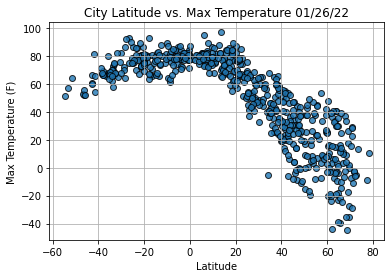

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

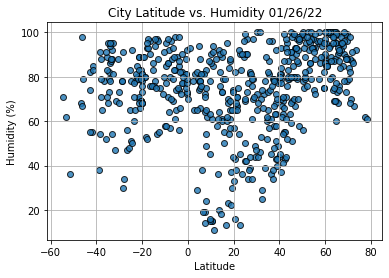

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()